# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [389]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

# Create two new dataframes
north_call_df = pd.read_csv('NorthCallCenter.csv')
south_call_df = pd.read_csv('SouthCallCenter.csv')

#print first 5 rows north df
north_call_df.head()

# print info north df
#north_call_df.info()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


# <span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [390]:
#Code Used: There are 9 reps in the North Branch
north_call_df['Rep ID'].unique()
north_call_df.nunique()
#Tried both methods of code and both show the same result. Second method works best

Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [391]:
#Code Used: There are 11 reps in the South branch
south_call_df.nunique()

Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [392]:
#Code Used: north_call_df[['column_name1', 'column_name2', ect...]].mean()

#Avg. Busy Min. - 9.987755102040817
#Avg. Not Ready Min. - 1.9142857142857144
#Avg. Incoming Wait Time - 3.048780487804878
#Avg. Durning Call Wait Time - 2.9673469387755103

north_call_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [393]:
#Code Used: south_call_df[['column_name1', 'columns_name2', ect...]].mean()

#Avg. Busy Min. - 10.054140127388536
#Avg. Not Ready Min. - 1.910828025477707 
#Avg. Incoming Wait Time - 3.0
#Avg. Durning Call Wait Time - 3.0764331210191083

south_call_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [394]:
# Code Used:

total_calls = (north_call_df['Time Block'].value_counts()) + (south_call_df['Time Block'].value_counts())
total_calls


10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There was missing data for "Incoming Wait Time" for both files, I went a head and deleted the data by dropping the column.  I felt that the data that was there was not significant enough to make much of a difference to the whole thing. UPDATE---I ended up commenting those lines of code out, cause I ended up using the 'Incoming Wait Time" later in the visualization section.   

In [395]:
# Code Used
# Add Additional Cells as needed.
north_call_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [396]:
#north_call_df['Incoming Wait Time'].isnull().value_counts()

In [397]:
# to_drop_north = ['Incoming Wait Time']
# north_call_df.drop(to_drop_north, inplace=True, axis=1)
# north_call_df.nunique()

In [398]:
#south_call_df.isnull().sum()

In [399]:
#south_call_df['Incoming Wait Time'].isnull().value_counts()

In [400]:
#south_call_df['Incoming Wait Time'].value_counts()

In [401]:
#south_call_df.nunique()

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: The strip() method combines the yes vaiables then strips the blank space that is left.  

In [405]:
#Code Used
# Add Additional Cells as needed.
north_call_df.nunique()
north_call_df['Sale'].value_counts()

north_call_df['Sale'] = north_call_df['Sale'].str.strip()
north_call_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I did not find any duplicates.

In [406]:
north_duplicates = north_call_df[north_call_df.duplicated()]
south_duplicates = south_call_df[south_call_df.duplicated()]
north_duplicates
south_duplicates

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [407]:
#Code Used
# Add Additional Cells as needed.
north_call_df.duplicated().sum()

0

In [408]:
south_call_df.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I decided to drop columns "Lost Call" and "Unnamed: 0". Both columns seemed unnecessary.  "Lost Call" was not needed for our analysis.  "Unnamed" didn't provide any information besides an index for the calls that already existed. I did attempt to look for unnecessary data using the code below but I didn't have any luck using it.  So I went through what the questions were that I would be working with and decided to remove the columns that way. 

In [409]:
north_num_rows = len(north_call_df.index)
north_low_information_cols = [] #

for col in north_call_df.columns:
    cnts = north_call_df[col].value_counts(dropna=False)
    top_pct = (cnts/north_num_rows).iloc[0]
    
    if top_pct > 0.95:
        north_low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    245
Name: Branch, dtype: int64

Sale: 95.51020%
NO     234
YES     11
Name: Sale, dtype: int64

Lost Call: 97.95918%
0    240
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.14286%
0    238
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    245
Name: Calls, dtype: int64



In [410]:
#Code Used
# Add Additional Cells as needed.
south_num_rows = len(south_call_df.index)
south_low_information_cols = [] #

for col in south_call_df.columns:
    cnts = south_call_df[col].value_counts(dropna=False)
    top_pct = (cnts/south_num_rows).iloc[0]
    
    if top_pct > 0.95:
        south_low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
South    314
Name: Branch, dtype: int64

Sale: 98.08917%
NO     308
YES      6
Name: Sale, dtype: int64

Lost Call: 96.49682%
0    303
1     11
Name: Lost Call, dtype: int64

Abandoned: 98.72611%
0    310
1      4
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    314
Name: Calls, dtype: int64



In [411]:
# Dropping unnecessary Data
north_call_df = north_call_df.drop(['Lost Call'], axis=1)
north_call_df = north_call_df.drop(['Unnamed: 0'], axis=1)
north_call_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,8,2,1.0,4,1


In [412]:
north_call_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [413]:
# Dropping unnecessary Data
south_call_df = south_call_df.drop(['Lost Call'], axis=1)
south_call_df = south_call_df.drop(['Unnamed: 0'], axis=1)
south_call_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [414]:
north_call_df.shape #Checking the shape before combining

(245, 13)

In [415]:
south_call_df.shape #Checking shape before combining

(314, 13)

In [416]:
# Create dataframe for the entire company named df
frames = [north_call_df, south_call_df]
df = pd.concat(frames)
print(df)


    Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID  \
0    North        Complaint    9:00 AM             Incoming     B   Brent   
1    North    Sales Support   11:00 AM             Incoming     A     Cam   
2    North    Sales Support   11:00 AM             Incoming     B    Todd   
3    North    Sales Support    4:00 PM             Incoming     B   Brent   
4    North  Product Support   12:00 PM             Incoming     B   Brent   
..     ...              ...        ...                  ...   ...     ...   
309  South  Product Support    5:00 PM             Outgoing     D   Helga   
310  South  Product Support    5:00 PM             Outgoing     C   Susan   
311  South  Product Support    5:00 PM             Outgoing     C   Sandy   
312  South  Product Support    5:00 PM             Outgoing     C    Eric   
313  South  Product Support    5:00 PM             Outgoing     D  George   

    Sale  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  \

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls


In [417]:
# Code Used
# Add Additional Cells as needed.


In [418]:
north_call_df['Rep ID'].value_counts()


Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [419]:
calls_rep_north = north_call_df.sort_values(by = ['Rep ID'], ascending = True).value_counts().sum()
calls_rep_north

82

In [420]:
calls_rep_south = south_call_df.sort_values(by =['Rep ID', ], ascending = True).value_counts().sum()
calls_rep_south

126

In [421]:
south_call_df['Rep ID'].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?  A: It does not appear so. 

In [422]:
# Code Used
# Add Additional Cells as needed.

# Average abandoned calls for the north call center
north_abandoned = north_call_df['Abandoned'].mean()
north_abandoned

0.02857142857142857

In [423]:
# Average abandoned calls for the south call center

south_abandoned = south_call_df['Abandoned'].mean()
south_abandoned

0.012738853503184714

In [424]:
# Average abandoned calls for company wide

total_abandoned = df['Abandoned'].mean()
total_abandoned

0.01967799642218247

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% with 33 calls
- South Branch = 38.1% with 48 calls
- Company Wide = 38.94% with 81 calls

In [425]:
# Code Used
# Add Additional Cells as needed.
north_call_answered_fast = (north_call_df['Incoming Wait Time'] <= 2).sum()
print(north_call_answered_fast)
total_north_incoming_calls = (north_call_df['Incoming or Outgoing'] == 'Incoming').sum()
(north_call_answered_fast/total_north_incoming_calls*100).round(2)

33


40.24

In [426]:
# South Call incoming
south_call_answered_fast = (south_call_df['Incoming Wait Time']<=2).sum()
print(south_call_answered_fast)
total_south_incoming_calls = (south_call_df['Incoming or Outgoing'] == 'Incoming').sum()
(south_call_answered_fast/total_south_incoming_calls*100).round(2)

48


38.1

In [427]:
# company wide incoming
df_call_answered_fast = (df['Incoming Wait Time']<=2).sum()
print(df_call_answered_fast)
total_df_incoming_calls = (df['Incoming or Outgoing'] == 'Incoming').sum()
(df_call_answered_fast/total_df_incoming_calls*100).round(2)

81


38.94

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [428]:
#Average Speed of answer for the north call center

north_speed = north_call_df['Incoming Wait Time'].sum()
north_calls = (north_call_df['Incoming or Outgoing'] == 'Incoming').sum()
(north_speed/north_calls).round(2)

3.05

In [429]:
# Average speed of answer for the south call center

south_speed = south_call_df['Incoming Wait Time'].sum()
south_calls = (south_call_df['Incoming or Outgoing'] == 'Incoming').sum()
(south_speed/south_calls).round(2)               

3.0

In [430]:
# Average speed of answer for company wide

total_speed = df['Incoming Wait Time'].sum()
total_calls = (df['Incoming or Outgoing'] == 'Incoming').sum()
(total_speed/total_calls).round(2)

3.02

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose the bar chart because it is the clearest  chart to show the difference between the two variable for each queue.

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}
       Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
Queue                                                                   
A              4           946                181               116.0   
B              3          1501                288               134.0   
C              1          1409                251               160.0   
D              3          1748                349               218.0   

       During Call Wait Time  Calls  
Queue                                
A                        272     96  
B                        455    149  
C                        435    138  
D                        531    176  


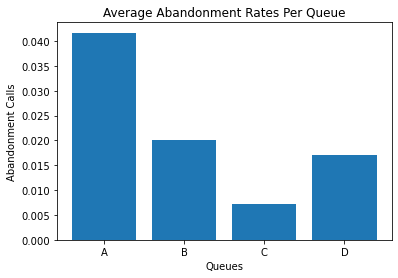

In [431]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
import matplotlib.pyplot as plt


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
print(abandonment_rates)
print(queue_dict)
#plt.barh(abandonment_rates['who'], abondonment_rates['fare'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

# y = abandonment_rates
# x = queues
# y_pos = np.arange(len(y))

# Legend


keys = abandonment_rates.keys()
values = abandonment_rates.values()

plt.title('Average Abandonment Rates Per Queue')
plt.xlabel('Queues')
plt.ylabel('Abandonment Calls')
plt.bar(keys, values, align = 'center' )
plt.savefig('bar.png')
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose the grouped bar chart.  The graph shows each Rep from the North Branch and compares the service level percentage and the average speed. 

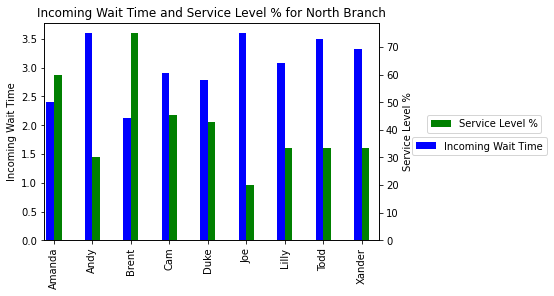

In [432]:
# Create visualization 2 here
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_call_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_call_df[north_call_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_call_df[north_call_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# Printing tables
# print(north_plt)
# print(service_level)
# print(total_stats)
# print(quick_stats)

#Your Code Here:

fig, ax1 = plt.subplots()

width=0.2

ax2 = ax1.twinx()
ax2.grid(False)

#plot line chart on axis #1
north_plt.plot(kind='bar', color='blue', ax=ax1, width=width, position=1)
service_level['Service Level %'].plot(kind='bar', color='green', ax=ax2, width=width, position=0)

ax1.set_ylabel('Incoming Wait Time')
ax2.set_ylabel('Service Level %')
plt.title('Incoming Wait Time and Service Level % for North Branch')
plt.xlabel('Rep ID')
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
#           fancybox=True, shadow=True, ncol=5)
# Code for Legend Combined
# handles,labels = [],[]
# for ax in fig.axes:
#     for h,l in zip(*ax.get_legend_handles_labels()):
#         handles.append(h)
#         labels.append(l)

# plt.legend(handles,labels, loc=2)

#fig.legend(loc="upper right")

# ax1.legend(bbox_to_anchor=(1.5, 0.5), loc="center",
#                 bbox_transform=fig.transFigure, ncol=3)
# ax2.legend(bbox_to_anchor=(1.5, 0.5), loc="center")
# plt.show()
ax1.legend(bbox_to_anchor=(1.3, 0.5), loc="upper right",
                bbox_transform=fig.transFigure, ncol=3)
ax2.legend(bbox_to_anchor=(1.5, 0.6), loc="upper right")
plt.show()

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: Similar to the graph above, I chose a grouped bar graph again.  Comparing this type of data seemed to be the best choice visually. I needed to compare incoming and outgoing calls up against 3 different call purposes.  In order to do this I created two new dictionaries one for incoming calls, and a second for outgoing calls.  Then I was able to group the call purpose on the x axis and show the comparison for each incoming and outgoing calls. But by using this method, it makes my code static since the values I had to manually put in.  If in a real world situation, it would be better to know how to get the values to automatically update.  

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


<AxesSubplot:title={'center':'Incoming vs. Outgoing Calls'}, xlabel='Call Purpose', ylabel='Number of Calls'>

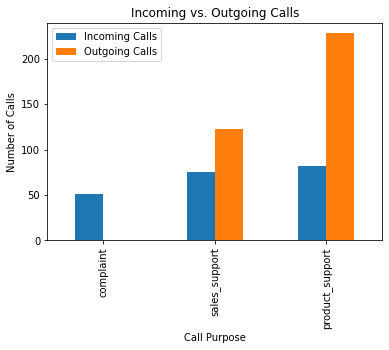

In [433]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


#Your Code Here:

#Create incoming dictionary
incoming_dict = {
    'complaint' : 51,
    'sales_support':75,
    'product_support':82
}

#Create Outgoing dictionay
outgoing_dict = {
    'complaint':0,
    'sales_support':123,
    'product_support':228
}



d = {
    'Incoming Calls' : incoming_dict,
    'Outgoing Calls' : outgoing_dict
}
pd.DataFrame(d).plot(kind='bar', title='Incoming vs. Outgoing Calls', ylabel='Number of Calls', xlabel='Call Purpose')
# x=np.arange(len(call_purpose))
# y1 = incoming_dict
# y1 = outgoing_dict

# width=0.4

# plt.bar(x-0.2, y1, width)
# plt.bar(x+0.2, y2, width)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: I think the South Branch is working more efficiently.  They have less abondonment rates.  Their average speed of answer a not much quicker than the north but it is by a small percentage.  But they are also taking more calls than the north branch.  If the north branch were to take on the same amount of calls, I don't think they would be able to keep the same speed as the south branch. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: I believe the North Branch would benefit from extra help.  Though their answer times are working within the desired range, they have many more abandoned calls compared to the south branch. they are recieving less calls, but the abondonment rate needs to be addressed. I think this would help balance out the average wait time to the service level for the north branch. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I felt like the data was very complete for the task. If anything, maybe the hours that the reps are working and taking calls?  I would like to know if the times match up the each branch and how they compare.  If one branch turns out is less busy and Reps are working less It wouldn't make sense to add the 5 new team members to that branch.  That would be the only other thing I can think of exploring.  But that might be do indepth for the project.  I think the data presented is well rounded.  


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [462]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_purposes = df["Call Purpose"].value_counts()
calls



display(call_times)
display(call_purposes)
# Use groupby to plot based on time blocks:
# time_grp = df.groupby('Time Block')
# display(call_times)
# time_grp.first()
# # Use groupby and get_group to select which call purpose to plot:
#time_get_group = df.groupy('Time Block').get_group()

,Time Block,Call Purpose,Incoming or Outgoing,Calls
0,9:00 AM,Complaint,Incoming,1
1,11:00 AM,Sales Support,Incoming,1
2,11:00 AM,Sales Support,Incoming,1
3,4:00 PM,Sales Support,Incoming,1
4,12:00 PM,Product Support,Incoming,1
...,...,...,...,...
309,5:00 PM,Product Support,Outgoing,1
310,5:00 PM,Product Support,Outgoing,1
311,5:00 PM,Product Support,Outgoing,1
312,5:00 PM,Product Support,Outgoing,1


Product Support    310
Sales Support      198
Complaint           51
Name: Call Purpose, dtype: int64

In [459]:
#time_grp.get_group(df['Time Block'])